# Regression Task -- The Amount of Purchase

Shuxin Mao

Data Stet: https://www.kaggle.com/mehdidag/black-friday

Load and Analysis Data:
* [Import the diabetes data set](#Import-the-diabetes-data-set)
* [Analyze the diabetes data set](#Analyze-the-diabetes-data-set)

Develop, Train and Analysis Different Regressiors' Perfomance:
* [Pre-process the data](#Pre-process-the-data)
* [Taining and Perfomance](#Tainin-and-Perfomance)

Imrove Regressiors' Perfomance:
* [Search Better Parameters](#Search-Better-Parameters)
* [Taining and Perfomance](#Tainin-and-Perfomance)

## Summary

Load and Analysis Data:
    The data has some missing feature values and object feature, so data pre-process part needs to encode the obejct value and then fill nan value. At last, only choose high relatted features as input features. Also train data and test data are splitted in this part.

Develop, Train and Analysis Regression Perfomance:
    Fitting trainning data into four regressors(Linear regression, Random Forest Regression, Neural Network and Gradient Boosting Regresion), then added L1 and L2 regulatization into these regressors. Using RMSE as error calculation and analysising regressors' perfomence by plotting learning curves.At last, using test data to compare differentregressorss' predic result.

In [13]:
# Required Modules
import tensorflow as tf
import pandas as pd
import re
import os
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso

## Import the diabetes data set

In [2]:
data = pd.read_csv('./data/BlackFriday.csv')

## Analyze the diabetes data set
including:
*	Output the type of the data.
*	Implement a scatter matrix to determine if any features strongly correlate.

In [3]:
class StringToOneHot(BaseEstimator, TransformerMixin):
    def __init__(self, s):
        self.s = s
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for i in self.s:
            encoder = LabelEncoder()
            X[i] = encoder.fit_transform(X[i]) 
        return X

In [4]:
data_pd = data.copy()

In [5]:
s1 = ['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years']
onehot = StringToOneHot(s1)
data_pd = onehot.transform(data_pd)

In [6]:
corr_matrix = data_pd.corr()
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
City_Category                 0.068507
Gender                        0.060086
Occupation                    0.021104
Age                           0.017717
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.086541
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64

# Pre-process the data

In [7]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes]

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

s0 = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Occupation','User_ID','Marital_Status']
s1 = ['Gender','Age','City_Category','Stay_In_Current_City_Years']

preprocessing_pipe = Pipeline([
    #('attribs_adder', CombinedAttributesAdder()),  
    ('Drop', DataFrameSelector(s0)), # Selects Fields from dataframe
    ('OneHot', StringToOneHot(s1)),
    ('Imputer', SimpleImputer(strategy='constant')), # Fill in NaN with most frequent    
    ('std_scaler', StandardScaler()),
    ])
train_x = preprocessing_pipe.fit_transform(train_set)
test_x = preprocessing_pipe.fit_transform(test_set)
train_y = train_set.Purchase.values
test_y = test_set.Purchase.values

In [9]:
X_train,X_val,y_train,y_val = train_test_split(train_x,train_y, test_size=0.2, random_state=42)

In [10]:
train_y.shape[0]

430061

# Taining and Perfomance

Linear Regression with Lass regularization

In [11]:
x = train_x.shape[0]*0.8
train_sizes =[i*10000+1 for i in range(int(x//10000))]
train_sizes[-1] = int(x)-1

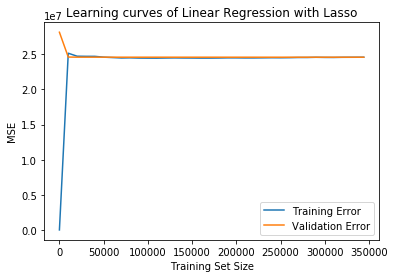

In [14]:
train_sizes,train_scores,validation_scores = learning_curve(Lasso(alpha=.3),
                                                            train_x,train_y,train_sizes = train_sizes,
                                                            cv=5,scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -validation_scores.mean(axis=1)
plt.plot(train_sizes,train_scores_mean,label='Training Error')
plt.plot(train_sizes,val_scores_mean,label='Validation Error')

plt.ylabel('MSE')
plt.xlabel('Training Set Size')
plt.title('Learning curves of Linear Regression with Lasso')
plt.legend(loc = 'lower right')
plt.savefig('lasso_learning')

In [15]:
lr_train,lr_val = np.sqrt(train_scores_mean[-1]),np.sqrt(val_scores_mean[-1])

Random Forest Regression

In [ ]:
train_sizes,train_scores,validation_scores = learning_curve(RandomForestRegressor(max_leaf_nodes =350),
                                                            train_x,train_y,train_sizes = train_sizes,
                                                            cv=5,scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -validation_scores.mean(axis=1)

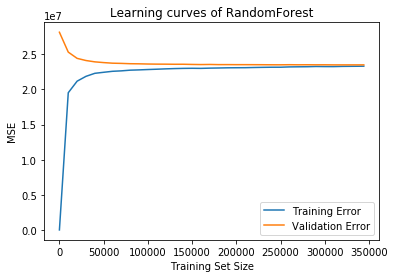

In [18]:
plt.plot(train_sizes,train_scores_mean,label='Training Error')
plt.plot(train_sizes,val_scores_mean,label='Validation Error')

plt.ylabel('MSE')
plt.xlabel('Training Set Size')
plt.title('Learning curves of RandomForest')
plt.legend(loc = 'lower right')
plt.savefig('randomforest_learning')

In [ ]:
rf_train,rf_val = np.sqrt(train_scores_mean[-1]),np.sqrt(val_scores_mean[-1])

Neural Network

In [24]:
x = 100000*0.8
train_sizes =[i*5000+1 for i in range(int(x//5000))]
train_sizes[-1] = int(x)-1


mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(5), random_state=1)

train_sizes,train_scores,validation_scores = learning_curve(mlp,
                                                            train_x[:100000],train_y[:100000],train_sizes = train_sizes,
                                                            cv=5,scoring='neg_mean_squared_error')

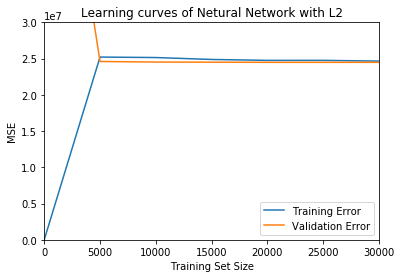

In [25]:
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -validation_scores.mean(axis=1)
plt.plot(train_sizes,train_scores_mean,label='Training Error')
plt.plot(train_sizes,val_scores_mean,label='Validation Error')

plt.ylabel('MSE')
plt.xlabel('Training Set Size')
plt.title('Learning curves of Netural Network with L2')
plt.legend(loc = 'lower right')
plt.axis([0,30000,0,3*(10**7)])
plt.savefig('nn_learning')


In [27]:
nn_train, nn_val = np.sqrt(train_scores_mean[-1]),np.sqrt(val_scores_mean[-1])

(4945.725676335926, 4946.9484963209)

Gradient Boosting Regression

In [46]:
x = 100000*0.8
train_sizes =[i*5000+1 for i in range(int(x//5000))]
train_sizes[-1] = int(x)-1


gbr = GradientBoostingRegressor()

train_sizes,train_scores,validation_scores = learning_curve(gbr,
                                                            train_x[:100000],train_y[:100000],train_sizes = train_sizes,
                                                            cv=5,scoring='neg_mean_squared_error')

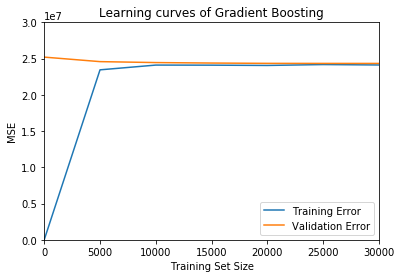

In [47]:
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -validation_scores.mean(axis=1)
plt.plot(train_sizes,train_scores_mean,label='Training Error')
plt.plot(train_sizes,val_scores_mean,label='Validation Error')

plt.ylabel('MSE')
plt.xlabel('Training Set Size')
plt.title('Learning curves of Gradient Boosting')
plt.legend(loc = 'lower right')
plt.axis([0,30000,0,3*(10**7)])
plt.savefig('gbr_learning')

In [48]:
gb_train, gb_val = np.sqrt(train_scores_mean[-1]),np.sqrt(val_scores_mean[-1])

(4912.283837488307, 4926.329240624049)

## Analyze the diabetes data set

In [49]:
train_errors = [lr_train, rf_train, nn_train, gb_train]
val_erros = [lr_val, rf_val, bb_val, gb_val]

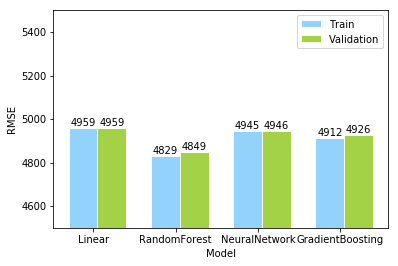

In [21]:
x=np.arange(4)

#plt.bar(x,train_errors,facecolor='#9999ff',edgecolor='white')
#rects1 = plt.bar(left=x, height=num_list1, width=0.4, alpha=0.8, color='red', label="一部门")
rects1 = plt.bar(x,train_errors, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='Train', lw=1)
rects2 = plt.bar(x+0.35,val_erros, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='Validation', lw=1)
plt.ylim(4500, 5500)     
plt.ylabel('RMSE')

plt.xticks(x+0.125, ['Linear','RandomForest','NeuralNetwork','GradientBoosting'])
plt.xlabel('Model')
plt.legend() 

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.savefig('compare_models')
plt.show()


## Search Better Parameters

In [55]:
model = RandomForestRegressor()
param_grid = {'n_estimators':range(10,71,10),
              'max_depth':range(3,14,2), 
              'min_samples_split': range(50,201,20),}

from sklearn.model_selection import GridSearchCV
estimator = GridSearchCV(model,param_grid )
estimator.fit(train_x[:30000],train_y[:30000])
print('Best paramters：',estimator.best_params_)


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best paramters： {'max_depth': 13, 'min_samples_split': 50, 'n_estimators': 60}


## Taining and Perfomance

In [56]:
x = train_x.shape[0]*0.8
train_sizes =[i*10000+1 for i in range(int(x//10000))]
train_sizes[-1] = int(x)-1

train_sizes,train_scores,validation_scores = learning_curve(RandomForestRegressor(max_depth=13, min_samples_split=50, n_estimators=60),
                                                            train_x,train_y,train_sizes = train_sizes,
                                                            cv=5,scoring='neg_mean_squared_error')

(4791.225716569768, 4823.73218335804)

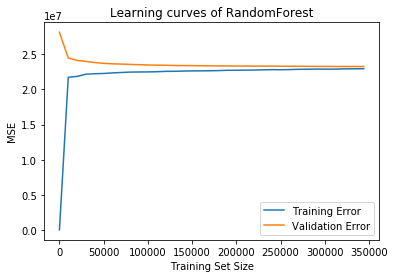

In [57]:
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -validation_scores.mean(axis=1)
plt.plot(train_sizes,train_scores_mean,label='Training Error')
plt.plot(train_sizes,val_scores_mean,label='Validation Error')

plt.ylabel('MSE')
plt.xlabel('Training Set Size')
plt.title('Learning curves of RandomForest')
plt.legend(loc = 'lower right')
plt.savefig('RF_best')
np.sqrt(train_scores_mean[-1]),np.sqrt(val_scores_mean[-1])

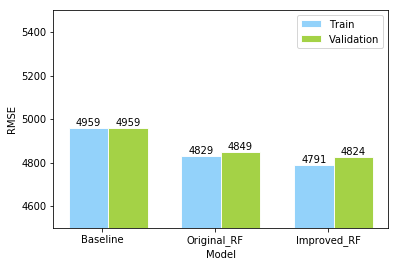

In [58]:
train_errors = [4959,4829,4791]
val_erros = [4959,4849,4824]

x=np.arange(3)

#plt.bar(x,train_errors,facecolor='#9999ff',edgecolor='white')
#rects1 = plt.bar(left=x, height=num_list1, width=0.4, alpha=0.8, color='red', label="一部门")
rects1 = plt.bar(x,train_errors, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='Train', lw=1)
rects2 = plt.bar(x+0.35,val_erros, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='Validation', lw=1)
plt.ylim(4500, 5500)     
plt.ylabel('RMSE')

plt.xticks(x+0.125, ['Baseline','Original_RF','Improved_RF'])
plt.xlabel('Model')
plt.legend() 

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.savefig('compare_models')
plt.show()